<a href="https://colab.research.google.com/github/Ravikanth45/FMLlab/blob/main/Logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICE**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
x = np.arange(10,110,10).reshape(-1, 1)
y = np.array([0,0,0,0,1,0,1,1,1,1])

In [ ]:
x, y

(array([[ 10],
        [ 20],
        [ 30],
        [ 40],
        [ 50],
        [ 60],
        [ 70],
        [ 80],
        [ 90],
        [100]]),
 array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1]))

In [ ]:
#3. Create model and train it
model = LogisticRegression(C=0.5)
model.fit(x,y)

LogisticRegression(C=0.5)

In [ ]:
model.intercept_

array([-7.06122836])

In [ ]:
model.coef_

array([[0.12838595]])

In [ ]:
model.predict_proba(x)

array([[0.99691271, 0.00308729],
       [0.98894231, 0.01105769],
       [0.96119581, 0.03880419],
       [0.87278277, 0.12721723],
       [0.65518986, 0.34481014],
       [0.34481076, 0.65518924],
       [0.12721754, 0.87278246],
       [0.03880429, 0.96119571],
       [0.01105772, 0.98894228],
       [0.0030873 , 0.9969127 ]])

In [ ]:
y_pred = model.predict(x)
print(y_pred)

[0 0 0 0 0 1 1 1 1 1]


In [ ]:
#accuracy
model.score(x, y)

0.8

In [ ]:
confusion_matrix(y, y_pred)

array([[4, 1],
       [1, 4]])

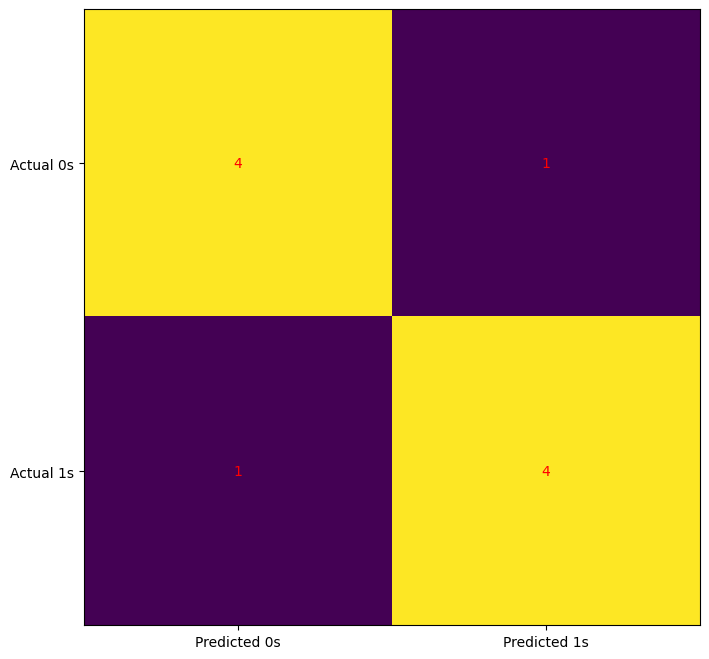

In [ ]:
#visualization of confusion matrix
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [ ]:
#more comprehensive report on the classification
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



# **IMPLEMENTATION WITH Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("car_data.csv")

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#create labelEncoder
le = preprocessing.LabelEncoder()
# Convert string label into numbers.
Gen=le.fit_transform(data['Gender'].values)
print(Gen)

In [13]:
X = np.vstack((data['User ID'].values ,Gen, data['Age'].values , data['AnnualSalary'].values)).T
y = data['Purchased'].values
X=X.reshape(-1,4)
X



array([[   385,      1,     35,  20000],
       [   681,      1,     40,  43500],
       [   353,      1,     49,  74000],
       ...,
       [   407,      0,     28, 138500],
       [   299,      0,     48, 134000],
       [   687,      0,     44,  73500]])

In [14]:
#3. Create model and train it
model = LogisticRegression(C=0.5)
model.fit(X,y)

LogisticRegression(C=0.5)

In [15]:
#attributes of your model
model.classes_

array([0, 1])

In [16]:
model.intercept_

array([-2.37093262])

In [17]:
model.coef_

array([[-1.24600607e-03, -1.53792252e+00,  6.66391834e-02,
         1.04119256e-05]])

In [18]:
model.predict_proba(X)

array([[0.86388712, 0.13611288],
       [0.83738509, 0.16261491],
       [0.5775912 , 0.4224088 ],
       ...,
       [0.39415218, 0.60584782],
       [0.13582707, 0.86417293],
       [0.38450694, 0.61549306]])

In [ ]:
#get the actual predictions
y_pred = model.predict(X)
print(y_pred)

In [22]:
#accuracy
model.score(X, y)

0.693

In [23]:
confusion_matrix(y, y_pred)

array([[441, 157],
       [150, 252]])

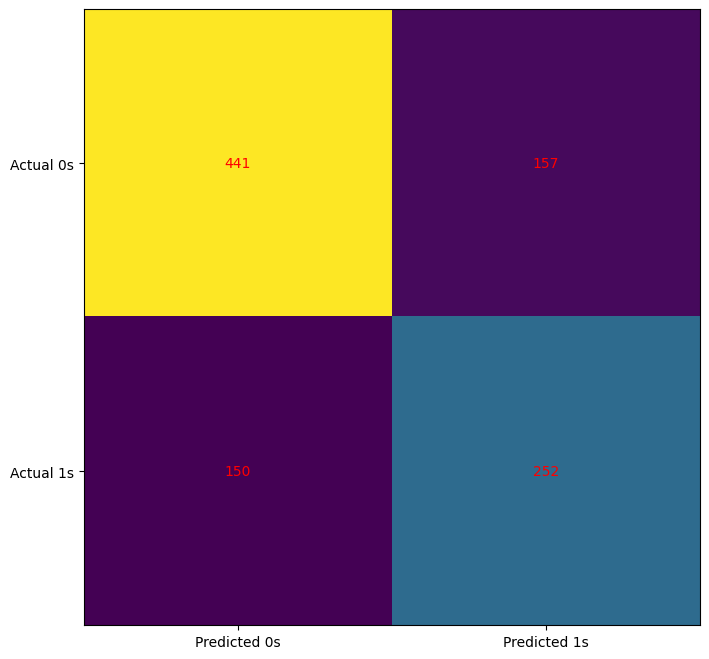

In [24]:
#visualization of confusion matrix
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [25]:
#more comprehensive report on the classification
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       598
           1       0.62      0.63      0.62       402

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000

